In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# (1)

주어진 방정식을 first-order forward difference in time 그리고 second-order central difference in space(FTCS scheme)으로 계산하시오. 속도 profile은 nt = 0, π/2, π, 3π/2,2π 일 때에 대하여 그리시오. 또한, quasi-steady state velocity profile을 (nt - T) = 0, π/2, π, 3π/2,2π 에 대하여 구하시오. T는 일종의 quasi-steady state 해를 얻기 위한 transient period로서 T = 10π 로 주어진다.

In [2]:
def u0(nt):
    return U*np.cos(nt)

In [3]:
v = 1
n = 2
U = 1
L = 10
dy = 0.1
dt = 0.001 * np.pi
t = 0
y_list = np.linspace(0, L, int(L/dy) + 1)
t_list = [0]
u_list = np.zeros(int(L/dy) + 1)
u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

u_t_list_FTCS =[u_list.copy()]

for j in range(2000):
    
    u_list_new = np.zeros(int(L/dy) + 1)
    u_list_new[0] = U * np.cos(n * (t+dt)) 
    u_list_new[-1] = 0 

    t += dt

    for i in range(1,len(u_list)-1):
        u_new = v*((u_list[i+1] - 2*u_list[i] + u_list[i-1]) / dy**2) * dt + u_list[i]
        
        u_list_new[i] = u_new
    
    u_list = u_list_new

    t_list.append(t)
    u_t_list_FTCS.append(u_list_new.copy())
    

Text(0.5, 1.0, 'Stokes Problem at t=0')

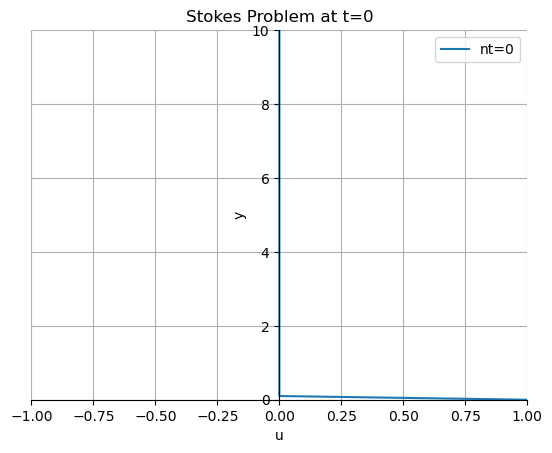

In [4]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[0], y_list, label='nt=0')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at t=0')

Text(0.5, 1.0, 'Stokes Problem at t=π/2')

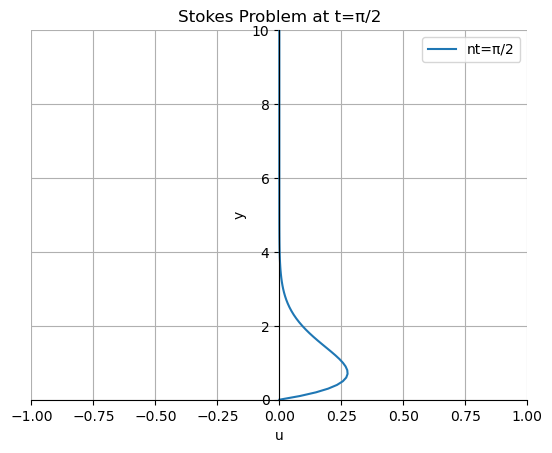

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[250], y_list, label='nt=π/2')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at t=π/2')

Text(0.5, 1.0, 'Stokes Problem at t=π')

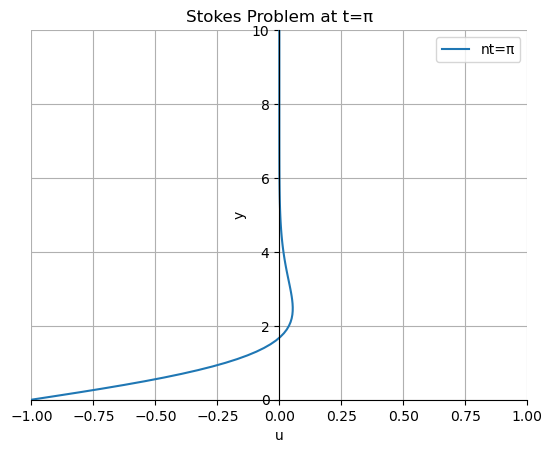

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[500], y_list, label='nt=π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at t=π')

Text(0.5, 1.0, 'Stokes Problem at t=3π/2')

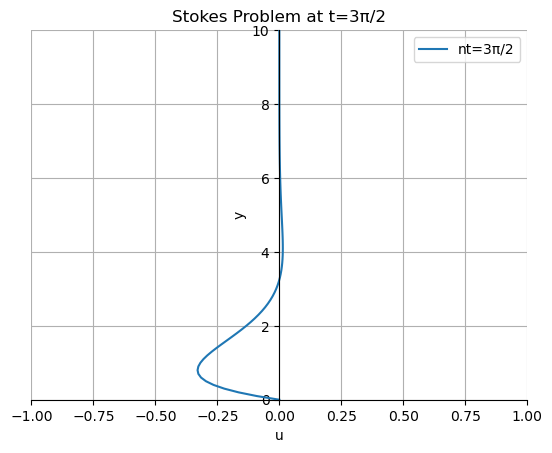

In [7]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[750], y_list, label='nt=3π/2')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at t=3π/2')

Text(0.5, 1.0, 'Stokes Problem at t=2π')

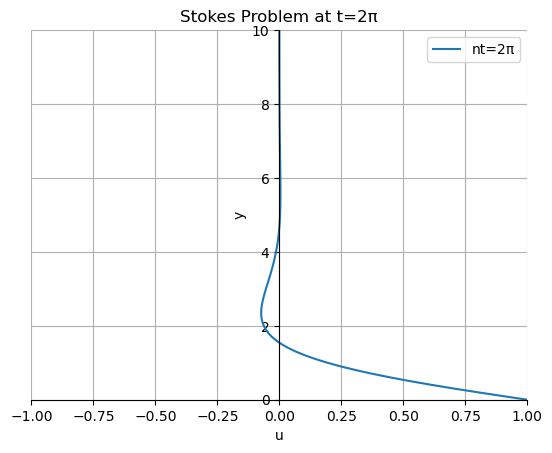

In [8]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[1000], y_list, label='nt=2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at t=2π')

Text(0.5, 1.0, 'Stokes Problem')

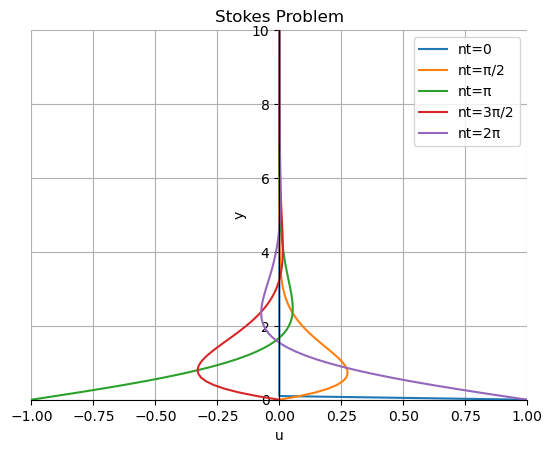

In [9]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[0], y_list, label='nt=0')
ax.plot(u_t_list_FTCS[250], y_list, label='nt=π/2')
ax.plot(u_t_list_FTCS[500], y_list, label='nt=π')
ax.plot(u_t_list_FTCS[750], y_list, label='nt=3π/2')
ax.plot(u_t_list_FTCS[1000], y_list, label='nt=2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem')

In [10]:
# for j in range(2000):
#     fig, ax = plt.subplots()

#     ax.set_xlim(-1, 1)
#     ax.set_ylim(0, 10)

#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_position(('data', 0))

#     ax.plot(u_t_list_FTCS[j], y_list)
#     ax.set_xlabel('u')
#     ax.set_ylabel('y')
#     plt.grid()
#     ax.set_title(f'Stokes Problem at t={dt * j:.5f}')

#     plt.savefig(f'image_unsteady/stokes_{j:04d}.png', dpi=150, bbox_inches='tight')
#     plt.close()  # 메모리 절약을 위해 figure 닫기
    

In [11]:
# gif_config = {
#     'loop':0, ## 0으로 세팅하면 무한 반복, 3으로 설정하면 3번 반복
#     'duration': 0.001 ## 다음 화면으로 넘어가는 시간 (초) - 더 작을수록 빠름
    
# }

# image_dir = './image_unsteady'  # 이미지가 저장된 디렉토리 

# ## gif로 만들 이미지를 리스트로 만들어 줌
# image_files = sorted([x for x in os.listdir(image_dir) if x.endswith('.png')])
# images = []

# # 프레임 건너뛰기 (더 빠른 애니메이션을 위해)
# frame_skip = 10  # 10개마다 하나씩 선택

# for i, img_file in enumerate(image_files):
#     if i % frame_skip == 0:  # frame_skip 간격으로 선택
#         img = plt.imread(os.path.join(image_dir, img_file))
        
#         # float 타입을 uint8로 변환 (0-1 범위를 0-255로 변환)
#         if img.dtype == np.float32 or img.dtype == np.float64:
#             img = (img * 255).astype(np.uint8)
        
#         # 4채널(RGBA)을 3채널(RGB)로 변환
#         if img.shape[-1] == 4:
#             img = img[:, :, :3]
        
#         images.append(img)
 
# ## mimwrite 대신 mimsave로도 가능
# imageio.mimwrite(os.path.join(image_dir, 'stokes_fast.gif'), ## 저장 경로
#                  images, ## 이미지 리스트
#                  format='gif', ## 저장 포맷
#                  **gif_config ## 부가 요소
#                 )

# print(f"빠른 GIF가 성공적으로 생성되었습니다! (총 {len(images)}개 프레임)")

In [33]:
v = 1
n = 2
U = 1
L = 10
dy = 0.1
dt = 0.001 * np.pi
t = 0
y_list = np.linspace(0, L, int(L/dy) + 1)
t_list = [0]
u_list = np.zeros(int(L/dy) + 1)
u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

u_t_list_FTCS =[u_list.copy()]

for j in range(12000):
    
    u_list_new = np.zeros(int(L/dy) + 1)
    u_list_new[0] = U * np.cos(n * (t+dt)) 
    u_list_new[-1] = 0 

    t += dt

    for i in range(1,len(u_list)-1):
        u_new = v*((u_list[i+1] - 2*u_list[i] + u_list[i-1]) / dy**2) * dt + u_list[i]
        
        u_list_new[i] = u_new
    
    u_list = u_list_new

    t_list.append(t)
    u_t_list_FTCS.append(u_list_new.copy())
    t_list.append(t)

Text(0.5, 1.0, 'Stokes Problem (quasi steady)')

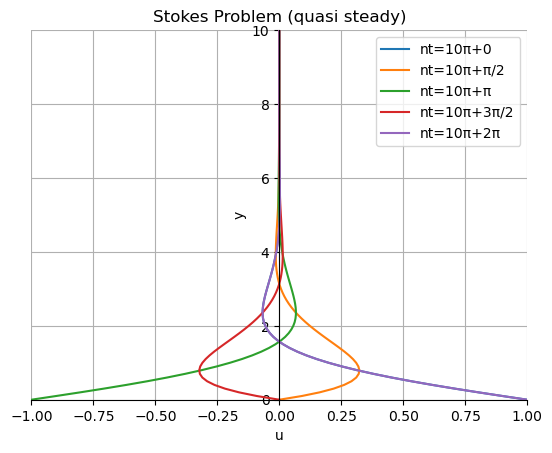

In [34]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_FTCS[5000], y_list, label='nt=10π+0')
ax.plot(u_t_list_FTCS[5250], y_list, label='nt=10π+π/2')
ax.plot(u_t_list_FTCS[5500], y_list, label='nt=10π+π')
ax.plot(u_t_list_FTCS[5750], y_list, label='nt=10π+3π/2')
ax.plot(u_t_list_FTCS[6000], y_list, label='nt=10π+2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem (quasi steady)')

# (2)

위 문제를 시간에 대하여 Crank-Nicolson scheme을 사용하여 계산하시오

In [14]:
v = 1
n = 2
U = 1
L = 10
dy = 0.1
dt = 0.001 * np.pi
t = 0

r = v*dt / (dy**2)/2

y_list = np.linspace(0, L, int(L/dy) + 1)
t_list = [0]
u_list = np.zeros(int(L/dy) + 1)
u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

u_t_list_CN =[u_list.copy()]

for j in range(12000):
    t = t+ dt
    u_list_old = np.zeros((int(L/dy)-1)) 
    r_list = np.zeros((int(L/dy)-1,int(L/dy)-1))            

    for i in range(int(L/dy)-1):
        if i == 0:
            r_list[i,i] = 1 + 2*r
            r_list[i,i+1] = -r
            
        elif i == int(L/dy)-2:
            r_list[i,i-1] = -r
            r_list[i,i] = 1 + 2*r
            
        else:
            r_list[i,i-1] = -r
            r_list[i,i] = 1 + 2*r
            r_list[i,i+1] = -r
            
    for i in range(int(L/dy)-1):        
        u_list_old[i] = r * u_t_list_CN[j][i] + (1 - 2*r) * u_t_list_CN[j][i+1] + r * u_t_list_CN[j][i+2]
    
    u_list_old[0] = u_list_old[0] + r* U * np.cos(n * t)
    
    u_list_new = np.linalg.solve(r_list, u_list_old)

    # boundary condition
    u_list_new = np.insert(u_list_new, 0, U * np.cos(n * t))  
    u_list_new = np.append(u_list_new, 0) 

    u_t_list_CN.append(u_list_new.copy())
    t_list.append(t)

Text(0.5, 1.0, 'Stokes Problem Crank-Nicolson')

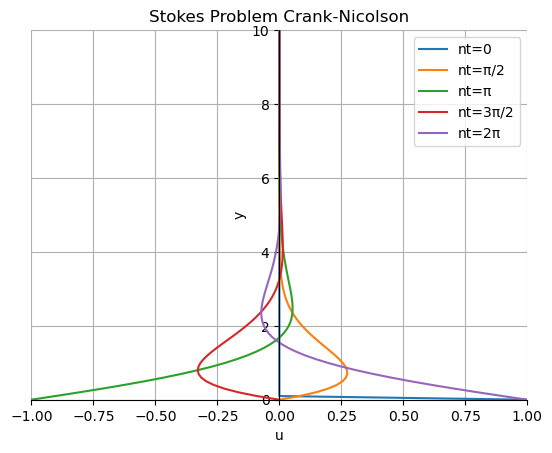

In [15]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_CN[0], y_list, label='nt=0')
ax.plot(u_t_list_CN[250], y_list, label='nt=π/2')
ax.plot(u_t_list_CN[500], y_list, label='nt=π')
ax.plot(u_t_list_CN[750], y_list, label='nt=3π/2')
ax.plot(u_t_list_CN[1000], y_list, label='nt=2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem Crank-Nicolson')

Text(0.5, 1.0, 'Stokes Problem Crank-Nicolson')

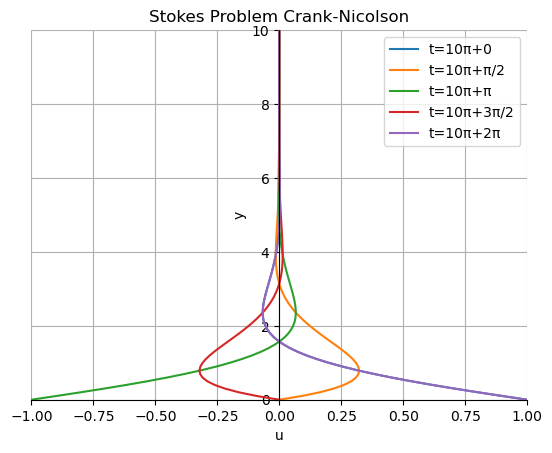

In [16]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_CN[5000], y_list, label='t=10π+0')
ax.plot(u_t_list_CN[5250], y_list, label='t=10π+π/2')
ax.plot(u_t_list_CN[5500], y_list, label='t=10π+π')
ax.plot(u_t_list_CN[5750], y_list, label='t=10π+3π/2')
ax.plot(u_t_list_CN[6000], y_list, label='t=10π+2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem Crank-Nicolson')

# 3

각각 다른 두개의 scheme에 대하여 시간의 변화에 따른 해의 수렴율을 구하시오 (log(Δt) vs
log (l2norm)). FTCS는 시간에 대한 1차, Crank-Nicolson은 2차의 수렴율을 보여야 한다.

In [17]:
v = 1
n = 2
U = 1
L = 10

In [18]:
def u_exact(t, y):
    n_s = (n/(v*2))**0.5*y
    u = U * np.exp(-n_s)*np.cos(n*t - n_s)
    return u


In [19]:
t_list = [0.001 * np.pi * i for i in range(12001)]

In [20]:
u_exact_list = []
for t in t_list:
    u = u_exact(t, y_list)
    u_exact_list.append(u.copy())

Text(0.5, 1.0, 'Stokes Problem Crank-Nicolson')

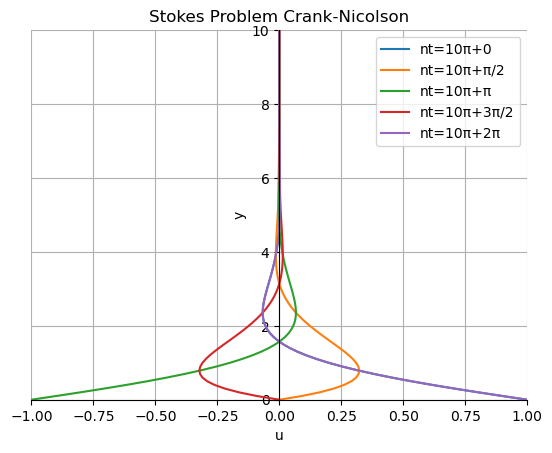

In [21]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_exact_list[5000], y_list, label='nt=10π+0')
ax.plot(u_exact_list[5250], y_list, label='nt=10π+π/2')
ax.plot(u_exact_list[5500], y_list, label='nt=10π+π')
ax.plot(u_exact_list[5750], y_list, label='nt=10π+3π/2')
ax.plot(u_exact_list[6000], y_list, label='nt=10π+2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem Crank-Nicolson')

## FTCS

In [22]:
# 초기 조건 다를 때
error_FTCS = []
dt_list = []
for k in range(650, 1000, 10):
    v = 1
    n = 2
    U = 1
    L = 10
    dy = 0.1
    dt = np.pi/k
    t = 0
    y_list = np.linspace(0, L, int(L/dy) + 1)
    t_list = [0]
    u_list = np.zeros(int(L/dy) + 1)
    u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

    u_t_list_FTCS =[u_list.copy()]

    u_exact_list = [u_exact(0, y_list)]

    for j in range(int(6*k)):
        
        u_list_new = np.zeros(int(L/dy) + 1)
        u_list_new[0] = U * np.cos(n * (t+dt)) 
        u_list_new[-1] = 0 

        t += dt

        for i in range(1,len(u_list)-1):
            u_new = v*((u_list[i+1] - 2*u_list[i] + u_list[i-1]) / dy**2) * dt + u_list[i]
            
            u_list_new[i] = u_new
        
        u_list = u_list_new

        u_t_list_FTCS.append(u_list_new.copy())
        u = u_exact(t, y_list)
        u_exact_list.append(u.copy())
    
    error_FTCS.append(np.linalg.norm(u_t_list_FTCS[int(6*k)] - u_exact_list[int(6*k)], 2)* np.sqrt(dy))
    dt_list.append(dt)
    print(k, error_FTCS)

650 [0.0009675408129263081]
660 [0.0009675408129263081, 0.000954159663392322]
670 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475]
680 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475, 0.000928779342895975]
690 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475, 0.000928779342895975, 0.0009167394449450851]
700 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475, 0.000928779342895975, 0.0009167394449450851, 0.0009051078279543935]
710 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475, 0.000928779342895975, 0.0009167394449450851, 0.0009051078279543935, 0.0008938668927664606]
720 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475, 0.000928779342895975, 0.0009167394449450851, 0.0009051078279543935, 0.0008938668927664606, 0.0008830000092698155]
730 [0.0009675408129263081, 0.000954159663392322, 0.0009412461622109475, 0.000928779342895975, 0.0009167394449450851, 0.0009051078279543935, 0.0

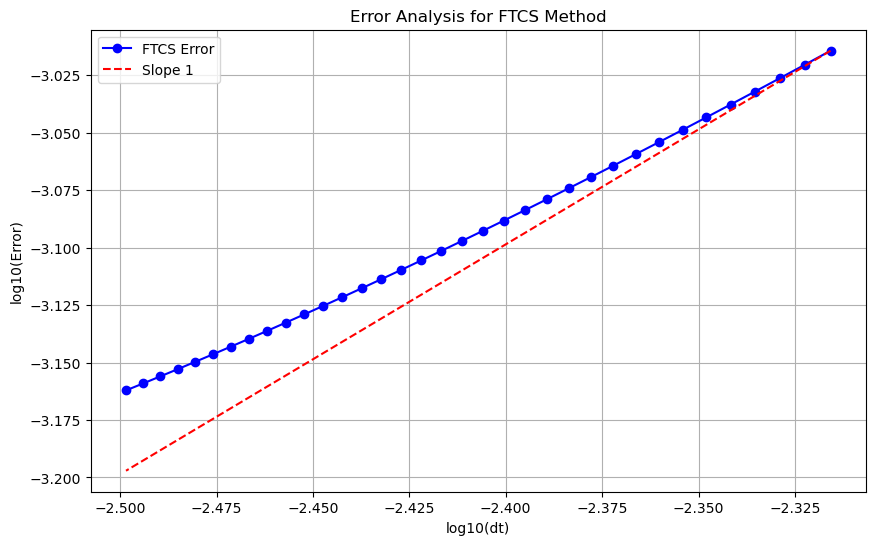

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(dt_list), np.log10(error_FTCS), marker='o', linestyle='-', color='b', label='FTCS Error')
plt.xlabel('log10(dt)')
plt.ylabel('log10(Error)')
plt.plot(np.log10(dt_list), (np.log10(dt_list)-np.log10(dt_list[0])+np.log10(error_FTCS[0])), linestyle='--', color='r', label='Slope 1')
plt.title('Error Analysis for FTCS Method')
plt.grid()
plt.legend()

In [24]:
from scipy.stats import linregress

print(f'order of accuracy: {linregress(np.log10(dt_list), np.log10(error_FTCS)).slope}')

order of accuracy: 0.8081905237120477


In [36]:
# 초기 조건 다를 때
error_FTCS = []
dt_list = []
for k in range(650, 1000, 10):
    v = 1
    n = 2
    U = 1
    L = 10
    dy = 0.1
    dt = np.pi/k
    t = 0
    y_list = np.linspace(0, L, int(L/dy) + 1)
    t_list = [0]
    u_list = np.zeros(int(L/dy) + 1)
    u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

    u_t_list_FTCS =[u_list.copy()]

    u_exact_list = [u_exact(0, y_list)]

    for j in range(int(12*k)):
        
        u_list_new = np.zeros(int(L/dy) + 1)
        u_list_new[0] = U * np.cos(n * (t+dt)) 
        u_list_new[-1] = 0 

        t += dt

        for i in range(1,len(u_list)-1):
            u_new = v*((u_list[i+1] - 2*u_list[i] + u_list[i-1]) / dy**2) * dt + u_list[i]
            
            u_list_new[i] = u_new
        
        u_list = u_list_new

        u_t_list_FTCS.append(u_list_new.copy())
        u = u_exact(t, y_list)
        u_exact_list.append(u.copy())
    
    error_FTCS.append(np.linalg.norm(u_t_list_FTCS[int(12*k)] - u_exact_list[int(12*k)], 2)* np.sqrt(dy))
    dt_list.append(dt)
    print(k, error_FTCS)

650 [0.000715254331101367]
660 [0.000715254331101367, 0.0006994908312870122]
670 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268]
680 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268, 0.0006693717255429832]
690 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268, 0.0006693717255429832, 0.0006549754150313766]
700 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268, 0.0006693717255429832, 0.0006549754150313766, 0.0006409960767767617]
710 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268, 0.0006693717255429832, 0.0006549754150313766, 0.0006409960767767617, 0.000627416155397593]
720 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268, 0.0006693717255429832, 0.0006549754150313766, 0.0006409960767767617, 0.000627416155397593, 0.0006142190759196028]
730 [0.000715254331101367, 0.0006994908312870122, 0.0006842036169340268, 0.0006693717255429832, 0.0006549754150313766, 0.0006409960767767617, 

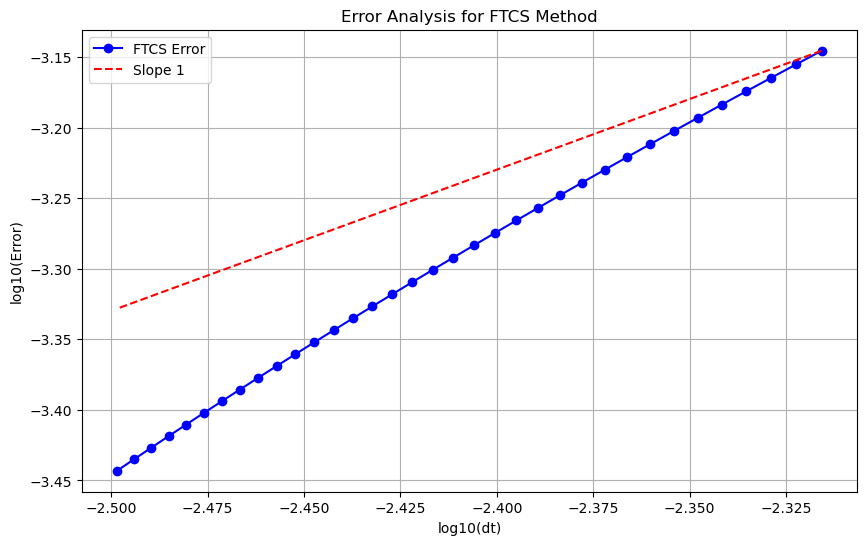

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(dt_list), np.log10(error_FTCS), marker='o', linestyle='-', color='b', label='FTCS Error')
plt.xlabel('log10(dt)')
plt.ylabel('log10(Error)')
plt.plot(np.log10(dt_list), (np.log10(dt_list)-np.log10(dt_list[0])+np.log10(error_FTCS[0])), linestyle='--', color='r', label='Slope 1')
plt.title('Error Analysis for FTCS Method')
plt.grid()
plt.legend()

## Crank-Nicolson

In [27]:
# 초기 조건 다를 때
error_CN = []
dt_list = []
for k in range(1, 100, 5):
    v = 1
    n = 2
    U = 1
    L = 10
    dy = 0.1
    dt = np.pi/k
    t = 0

    r = v*dt / (dy**2)/2

    y_list = np.linspace(0, L, int(L/dy) + 1)
    t_list = [0]
    u_list = np.zeros(int(L/dy) + 1)
    u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

    u_t_list_CN =[u_list.copy()]

    u_exact_list = [u_exact(0, y_list)]

    for j in range(int(6*k)):
        t = t+ dt
        u_list_old = np.zeros((int(L/dy)-1)) 
        r_list = np.zeros((int(L/dy)-1,int(L/dy)-1))

        for i in range(int(L/dy)-1):
            if i == 0:
                r_list[i,i] = 1 + 2*r
                r_list[i,i+1] = -r
                
            elif i == int(L/dy)-2:
                r_list[i,i-1] = -r
                r_list[i,i] = 1 + 2*r
                
            else:
                r_list[i,i-1] = -r
                r_list[i,i] = 1 + 2*r
                r_list[i,i+1] = -r
        
        for i in range(int(L/dy)-1):        
            u_list_old[i] = r * u_t_list_CN[j][i] + (1 - 2*r) * u_t_list_CN[j][i+1] + r * u_t_list_CN[j][i+2]
        
        u_list_old[0] = u_list_old[0] + r* U * np.cos(n * t)
            
        u_list_new = np.linalg.solve(r_list, u_list_old)

        # boundary condition
        u_list_new = np.insert(u_list_new, 0, U * np.cos(n * t))  
        u_list_new = np.append(u_list_new, 0) 

        u_t_list_CN.append(u_list_new.copy())
        t_list.append(t)

        u = u_exact(t, y_list)
        u_exact_list.append(u.copy())
    
    error_CN.append(np.linalg.norm(u_t_list_CN[int(6*k)] - u_exact_list[int(6*k)], 2)* np.sqrt(dy))
    dt_list.append(dt)
    print(k, error_CN)

1 [1.490482328668914]
6 [1.490482328668914, 0.044066229444297604]
11 [1.490482328668914, 0.044066229444297604, 0.008334088197432763]
16 [1.490482328668914, 0.044066229444297604, 0.008334088197432763, 0.00357959562996665]
21 [1.490482328668914, 0.044066229444297604, 0.008334088197432763, 0.00357959562996665, 0.002082587270870705]
26 [1.490482328668914, 0.044066229444297604, 0.008334088197432763, 0.00357959562996665, 0.002082587270870705, 0.001390108043242308]
31 [1.490482328668914, 0.044066229444297604, 0.008334088197432763, 0.00357959562996665, 0.002082587270870705, 0.001390108043242308, 0.0010278903216426852]
36 [1.490482328668914, 0.044066229444297604, 0.008334088197432763, 0.00357959562996665, 0.002082587270870705, 0.001390108043242308, 0.0010278903216426852, 0.0008259473639627268]
41 [1.490482328668914, 0.044066229444297604, 0.008334088197432763, 0.00357959562996665, 0.002082587270870705, 0.001390108043242308, 0.0010278903216426852, 0.0008259473639627268, 0.0007094293464404359]
46 

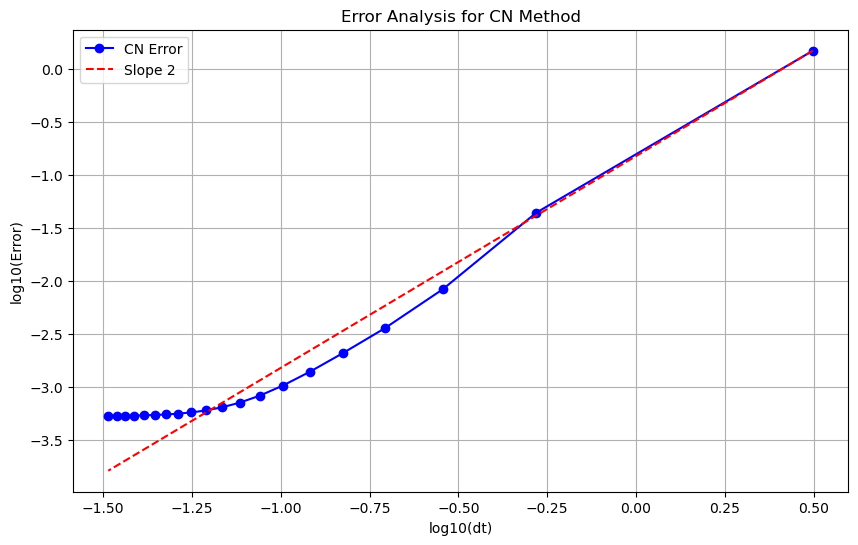

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(dt_list), np.log10(error_CN), marker='o', linestyle='-', color='b', label='CN Error')
plt.xlabel('log10(dt)')
plt.ylabel('log10(Error)')
plt.plot(np.log10(dt_list), 2*(np.log10(dt_list)-np.log10(dt_list[0]))+np.log10(error_CN[0]), linestyle='--', color='r', label='Slope 2')
plt.title('Error Analysis for CN Method')
plt.grid()
plt.legend()

# 4

In [29]:
v = 1
n = 2
U = 1
L = 2
dy = 0.1
dt = 0.001 * np.pi
t = 0

r = v*dt / (dy**2)/2

y_list = np.linspace(0, L, int(L/dy) + 1)
t_list = [0]
u_list = np.zeros(int(L/dy) + 1)
u_list[0] = U * np.cos(n * t)  # Initial condition at t=0

u_t_list_CN =[u_list.copy()]

for j in range(6000):
    t = t+ dt
    u_list_old = np.zeros((int(L/dy)-1)) 
    r_list = np.zeros((int(L/dy)-1,int(L/dy)-1))            

    for i in range(int(L/dy)-1):
        if i == 0:
            r_list[i,i] = 1 + 2*r
            r_list[i,i+1] = -r
            
        elif i == int(L/dy)-2:
            r_list[i,i-1] = -r
            r_list[i,i] = 1 + 2*r
            
        else:
            r_list[i,i-1] = -r
            r_list[i,i] = 1 + 2*r
            r_list[i,i+1] = -r
            
    for i in range(int(L/dy)-1):        
        u_list_old[i] = r * u_t_list_CN[j][i] + (1 - 2*r) * u_t_list_CN[j][i+1] + r * u_t_list_CN[j][i+2]
    
    u_list_old[0] = u_list_old[0] + r* U * np.cos(n * t)
    
    u_list_new = np.linalg.solve(r_list, u_list_old)

    # boundary condition
    u_list_new = np.insert(u_list_new, 0, U * np.cos(n * t))  
    u_list_new = np.append(u_list_new, 0) 

    u_t_list_CN.append(u_list_new.copy())
    t_list.append(t)

Text(0.5, 1.0, 'Stokes Problem L=2 CN')

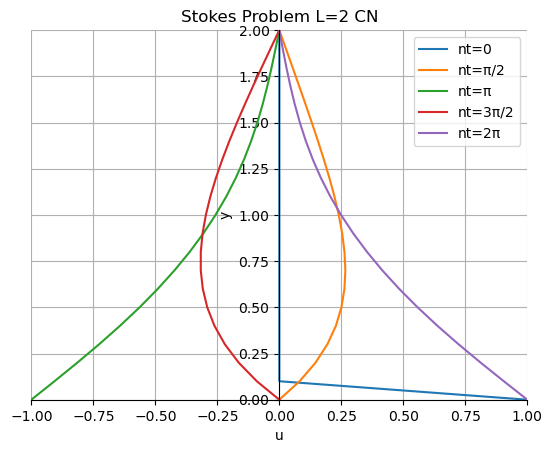

In [30]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_CN[0], y_list, label='nt=0')
ax.plot(u_t_list_CN[250], y_list, label='nt=π/2')
ax.plot(u_t_list_CN[500], y_list, label='nt=π')
ax.plot(u_t_list_CN[750], y_list, label='nt=3π/2')
ax.plot(u_t_list_CN[1000], y_list, label='nt=2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem L=2 CN')

Text(0.5, 1.0, 'Stokes Problem L=2 CN')

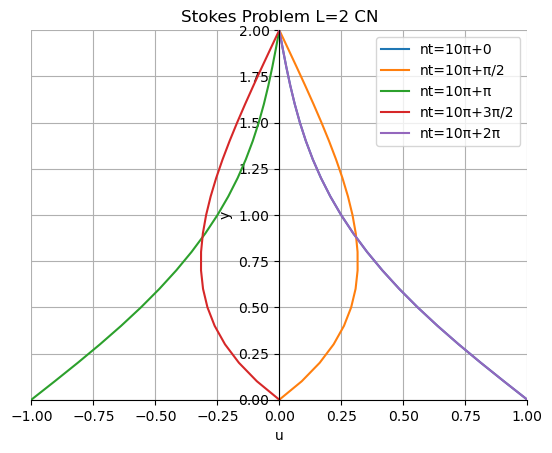

In [31]:
fig, ax = plt.subplots()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_t_list_CN[5000], y_list, label='nt=10π+0')
ax.plot(u_t_list_CN[5250], y_list, label='nt=10π+π/2')
ax.plot(u_t_list_CN[5500], y_list, label='nt=10π+π')
ax.plot(u_t_list_CN[5750], y_list, label='nt=10π+3π/2')
ax.plot(u_t_list_CN[6000], y_list, label='nt=10π+2π')
ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem L=2 CN')